In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [18]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [19]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [20]:
EXPERIMENT_NAME = 'stress_testing_with_cols_nulls'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = 'b78b8941-d4f2-40bc-b07f-e79fa0ff8709'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median']

In [21]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [22]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [23]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [24]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(80, 25)

In [25]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,0,OK,2023-05-02 09:50:34.990,...,100,100,"[1, 2, 3, 4]",0.708333,0.708978,0.707317,0.706320,0.723404,0.704918,0.722772
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,1,OK,2023-05-02 09:50:34.999,...,100,100,"[1, 2, 3, 4]",0.695076,0.684211,0.712195,0.676580,0.723404,0.688525,0.722772
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,2,OK,2023-05-02 09:50:35.007,...,100,100,"[1, 2, 3, 4]",0.681818,0.678019,0.687805,0.669145,0.723404,0.672131,0.722772
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,3,OK,2023-05-02 09:50:35.017,...,100,100,"[1, 2, 3, 4]",0.696970,0.705882,0.682927,0.710037,0.680851,0.700234,0.683168
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,4,OK,2023-05-02 09:50:35.028,...,100,100,"[1, 2, 3, 4]",0.704545,0.708978,0.697561,0.702602,0.723404,0.697892,0.732673
10,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,0,OK,2023-05-02 09:50:34.990,...,100,100,"[1, 2, 3, 4]",0.233258,0.000000,0.206868,0.000000,0.000000,0.247079,0.000000
11,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,1,OK,2023-05-02 09:50:34.999,...,100,100,"[1, 2, 3, 4]",0.235022,0.000000,0.198711,0.000000,0.000000,0.250884,0.000000
12,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,2,OK,2023-05-02 09:50:35.007,...,100,100,"[1, 2, 3, 4]",0.233250,0.000000,0.199198,0.000000,0.000000,0.247069,0.000000
13,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,3,OK,2023-05-02 09:50:35.017,...,100,100,"[1, 2, 3, 4]",0.234094,0.000000,0.213706,0.000000,0.000000,0.249953,0.000000
14,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,10,4,OK,2023-05-02 09:50:35.028,...,100,100,"[1, 2, 3, 4]",0.231128,0.000000,0.204191,0.000000,0.000000,0.247808,0.000000


In [26]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [27]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

## Metrics Visualization and Reporting

In [28]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

### Subgroup metrics per dataset, experiment iteration, and model

In [29]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [30]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [31]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [32]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [33]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [34]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Label_Stability',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [35]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [36]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Accuracy',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [37]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric=visualizer.all_group_variance_metrics_lst[1],
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [38]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [39]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

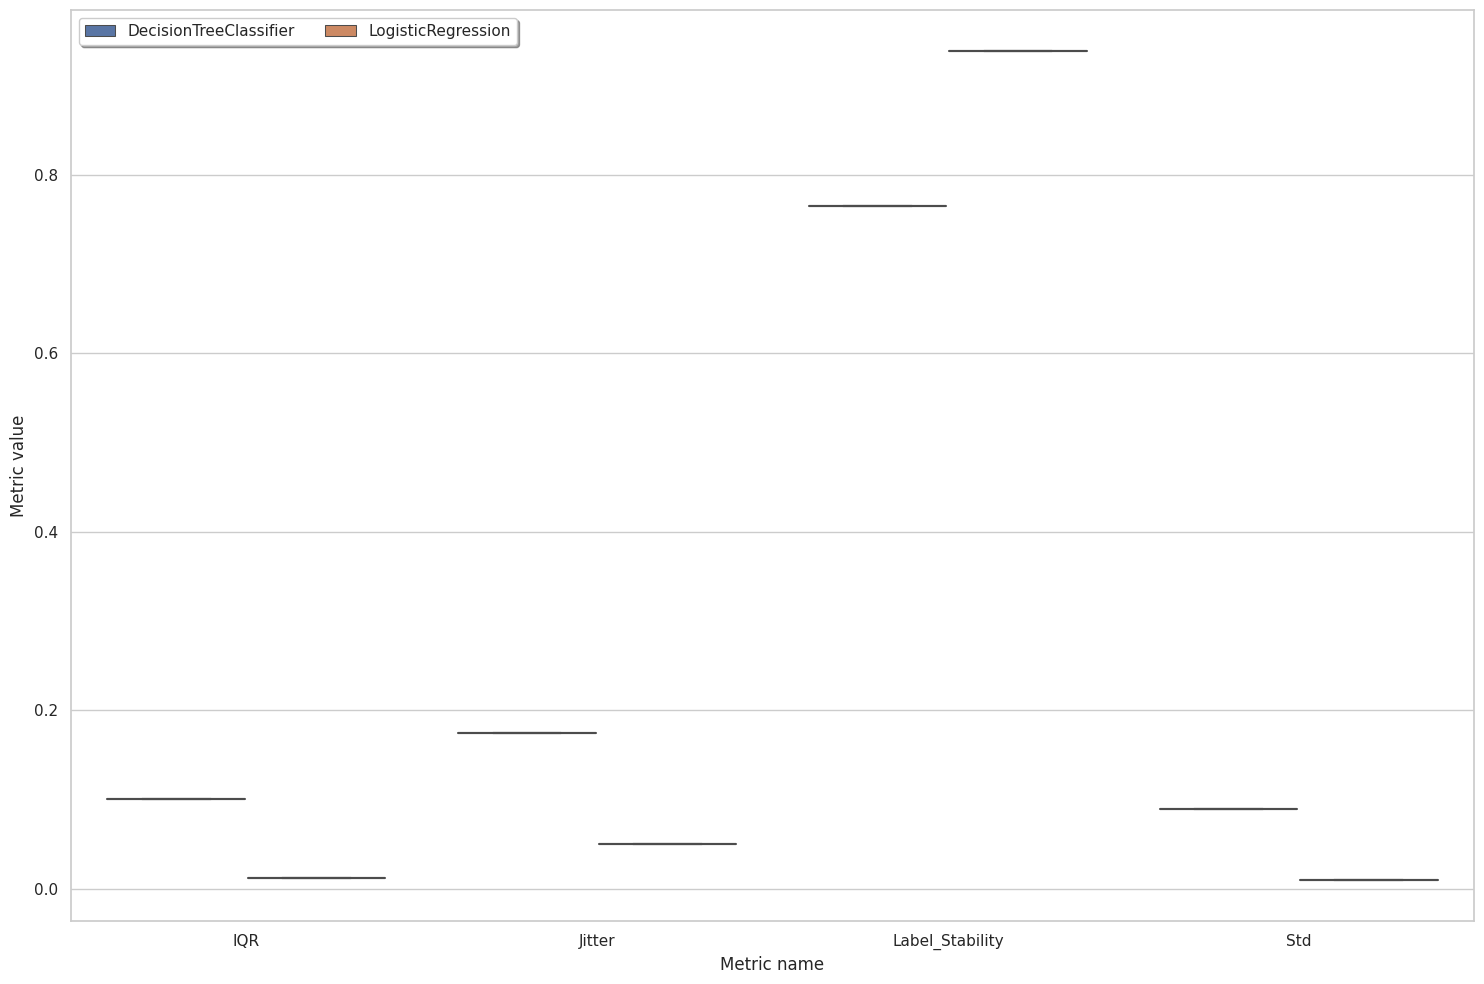

In [41]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

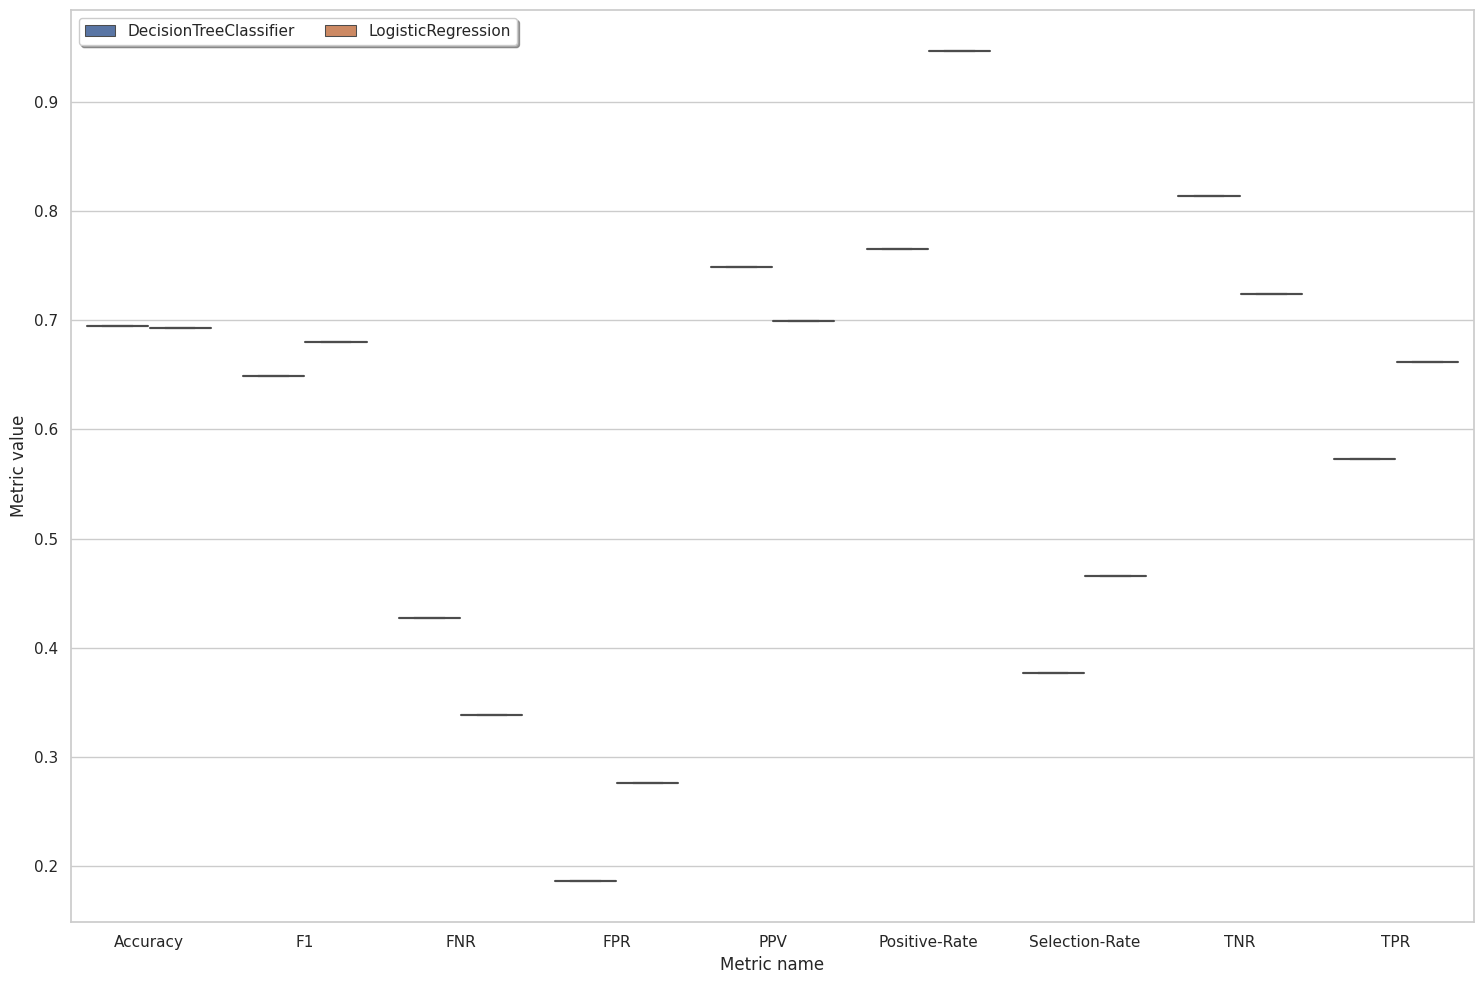

In [42]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

### Box plots for subgroup metrics per model and error level

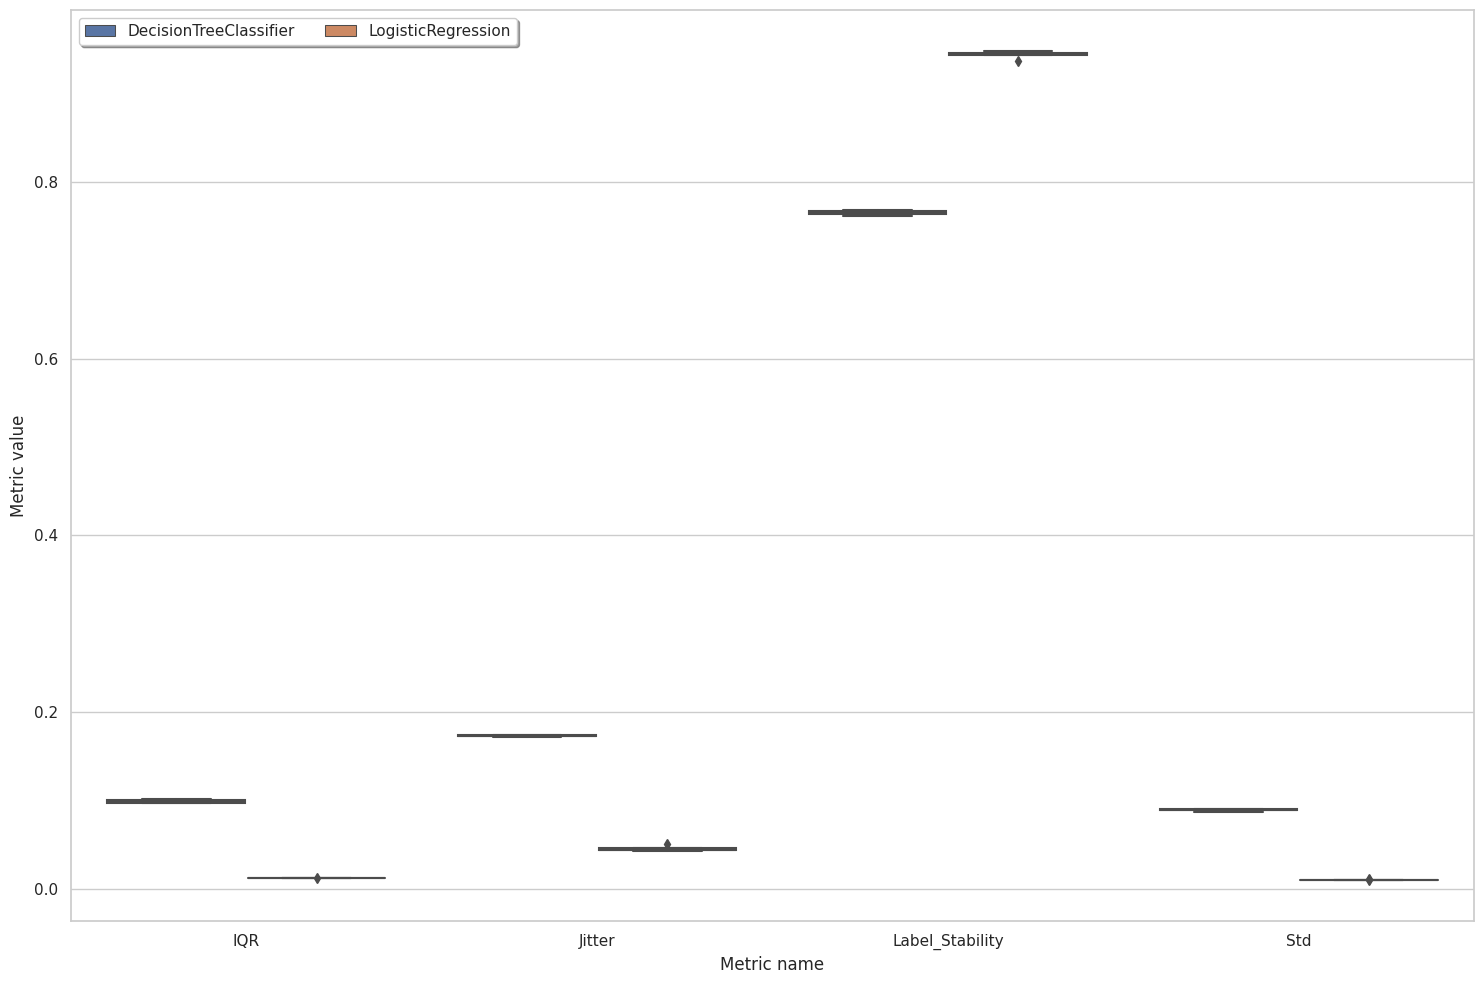

In [43]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

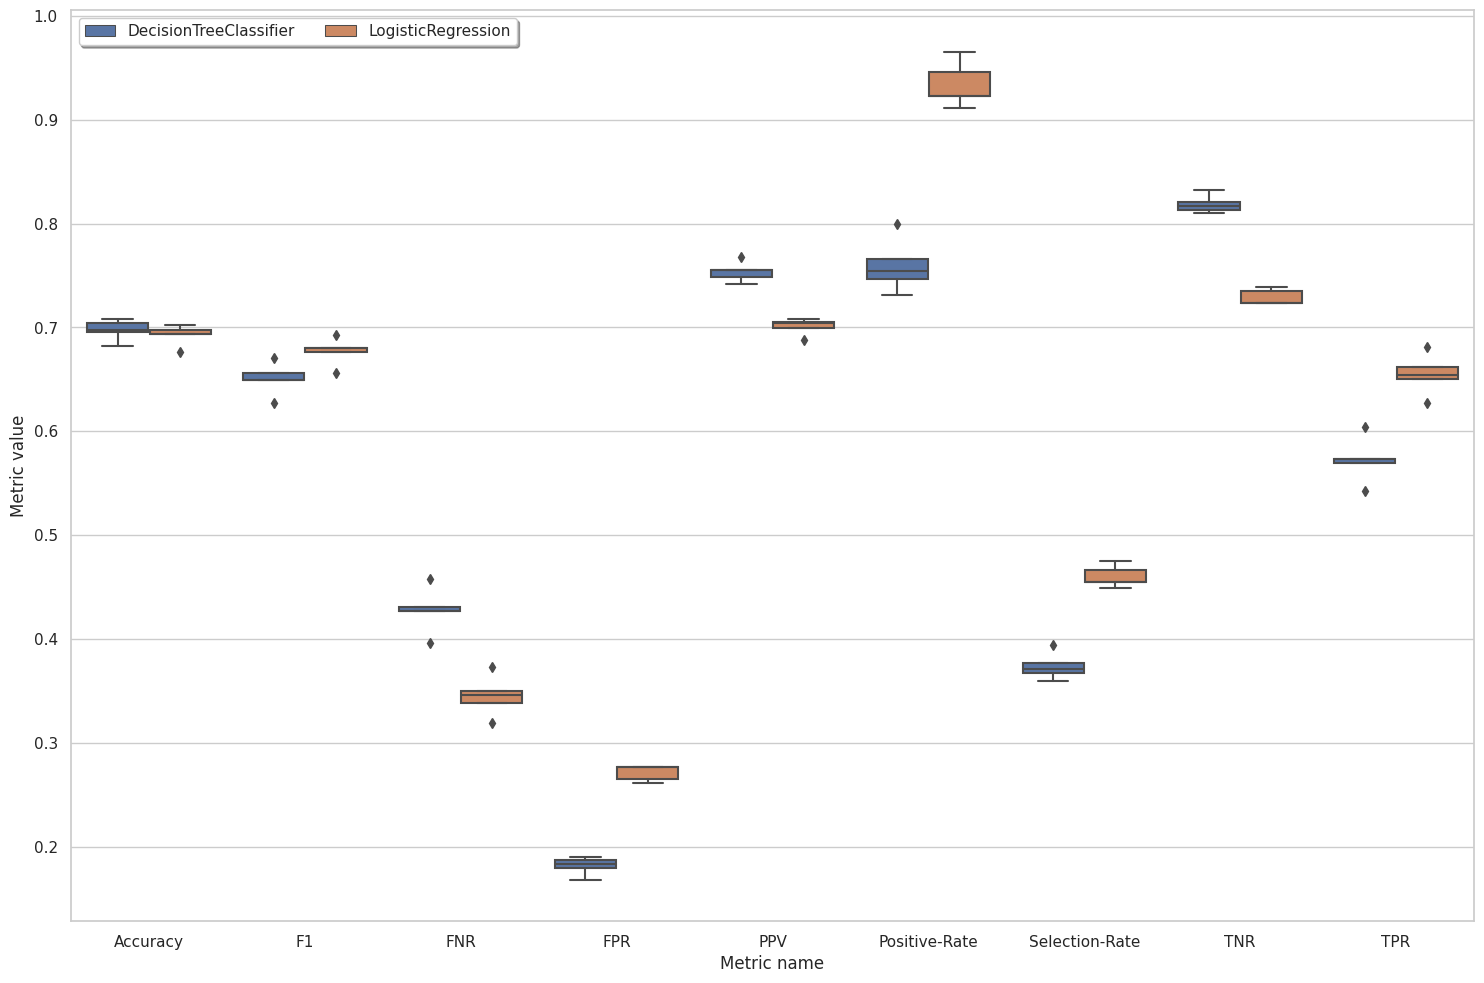

In [44]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

### Box plots for group metrics per model and error level

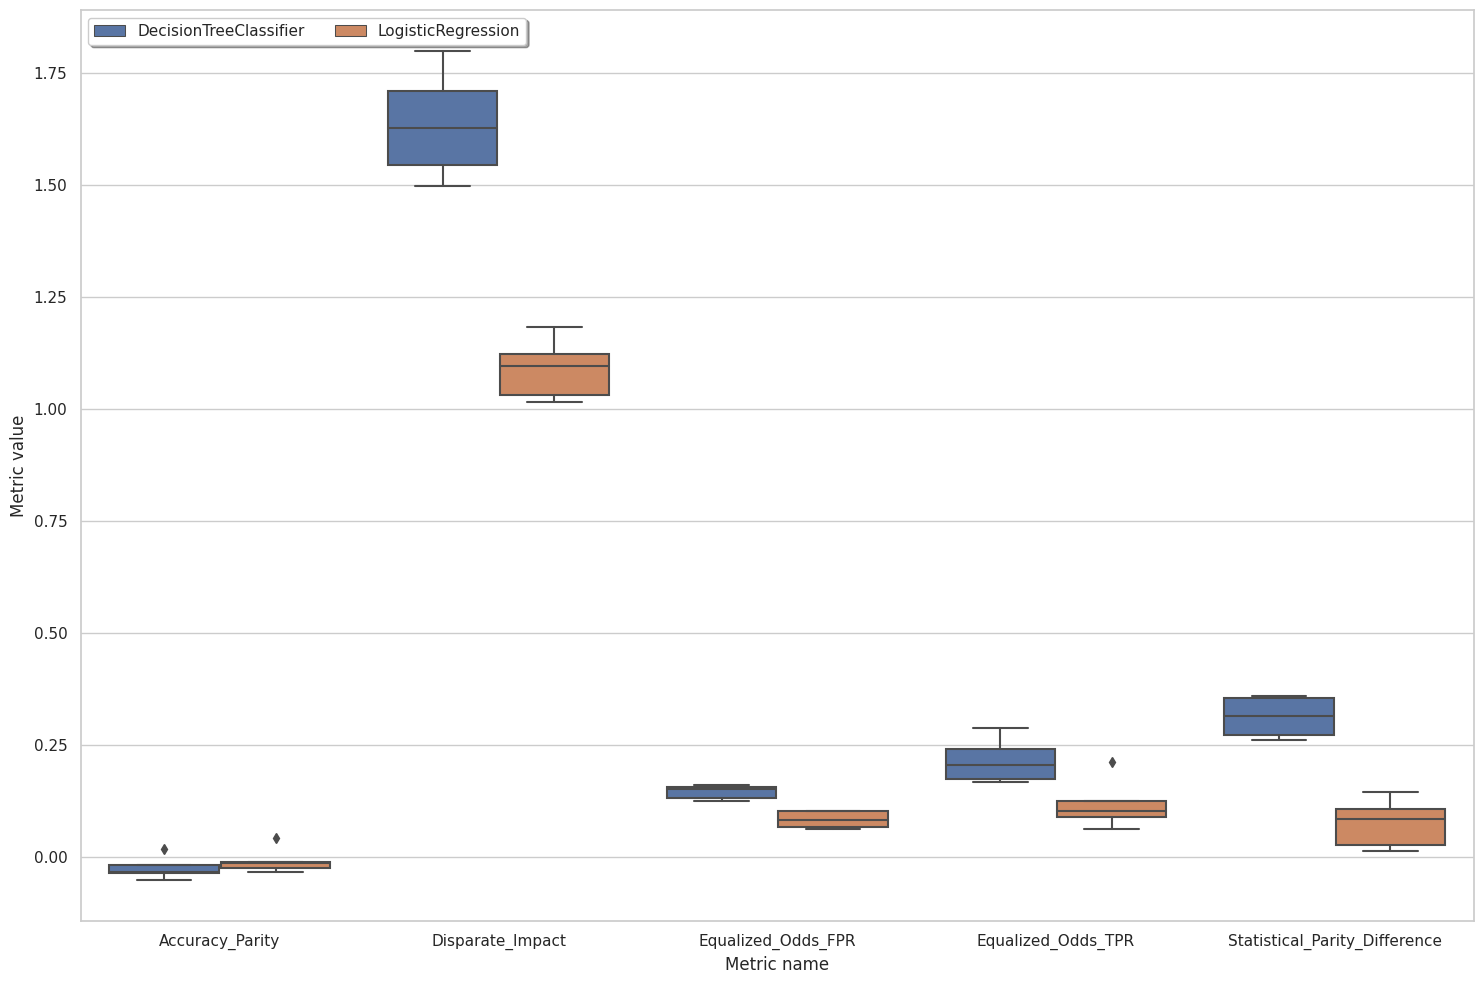

In [45]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='fairness')

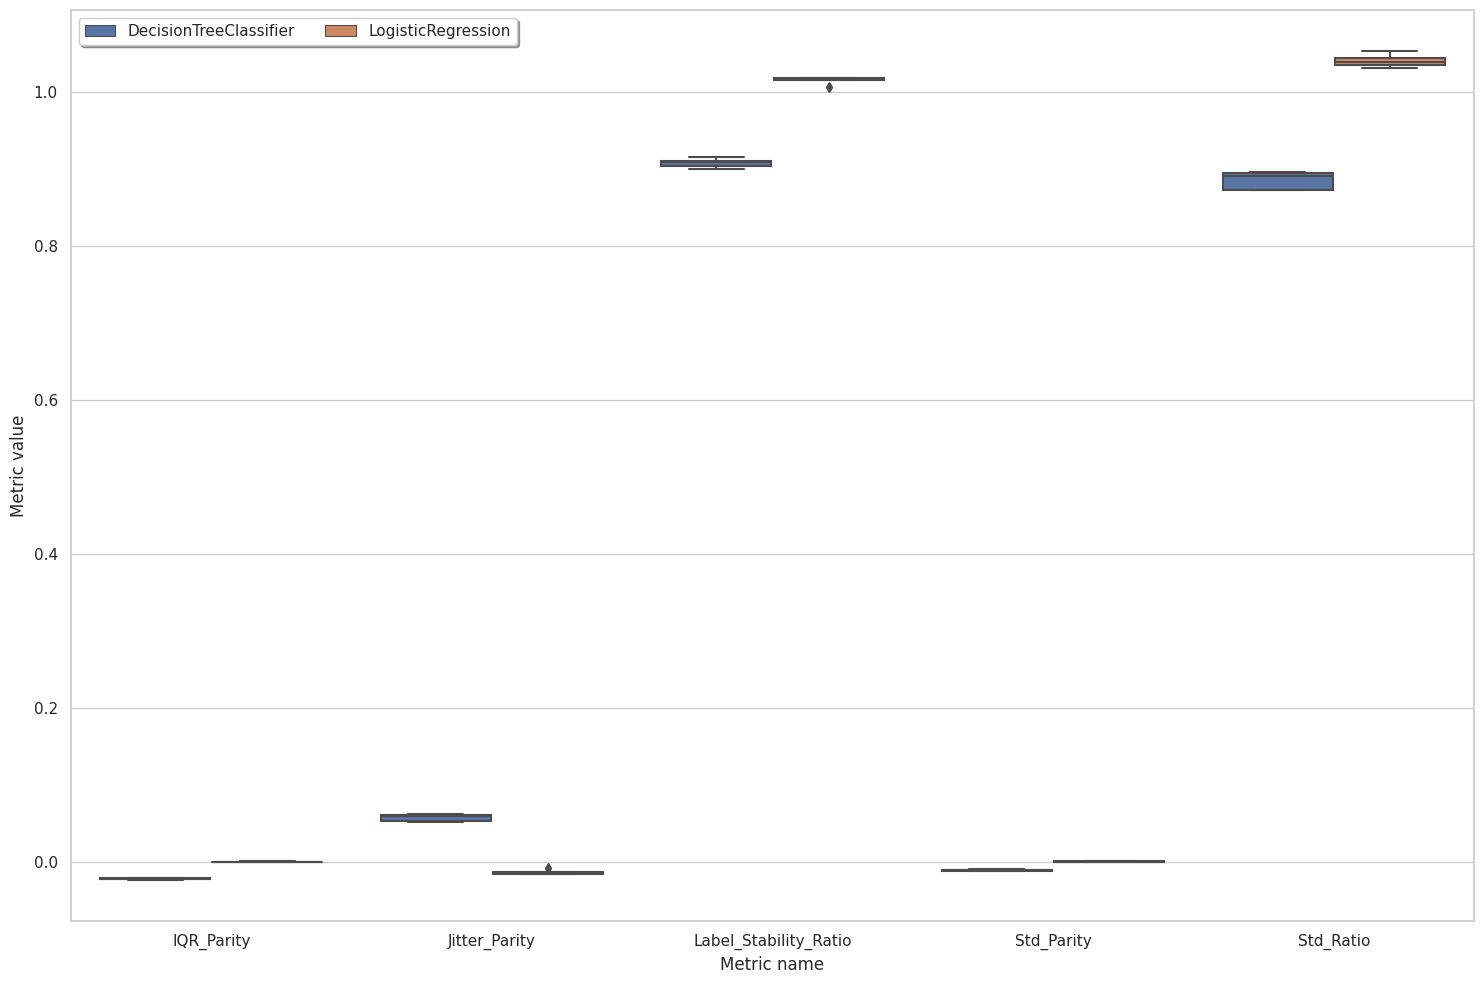

In [46]:
visualizer.create_group_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                  target_group='sex',
                                                                  group_metrics_type='variance')

### One box plot for both error and variance metrics for subgroups

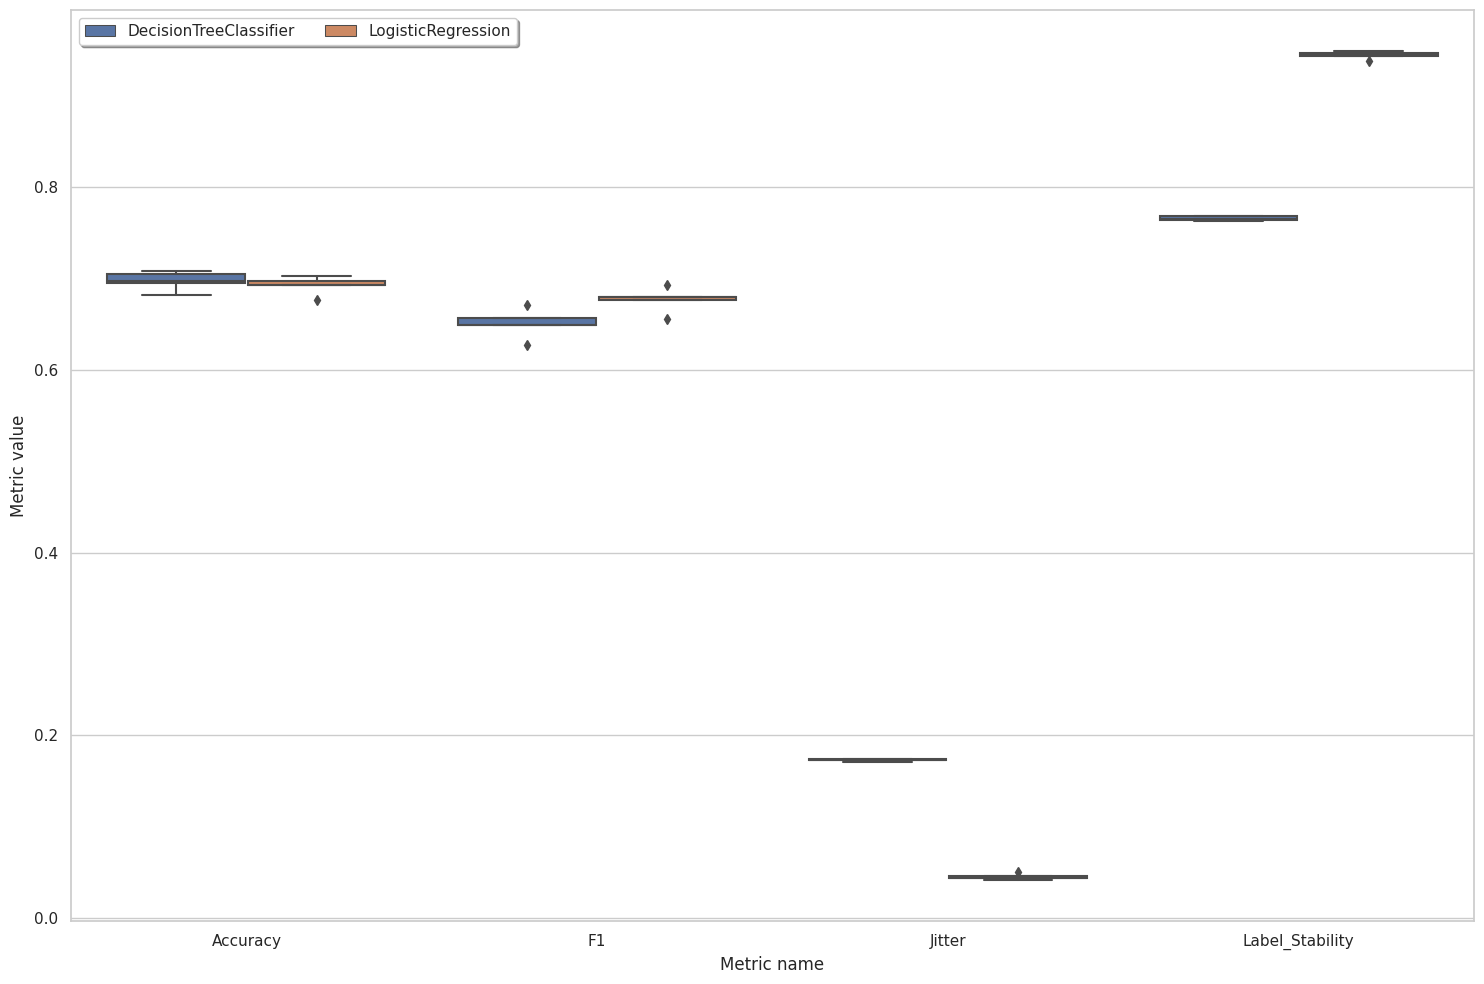

In [47]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics=['F1', 'Accuracy', 'Jitter', 'Label_Stability'])